In [2]:
import numpy as np
import pandas as pd
from brian2 import *   
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ewa/Desktop/magisterka/MEAanalysis/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ewa/Desktop/magisterka/MEAanalysis/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
path = "../data/spike_matrix.csv"

df = pd.read_csv(path, header = 0)

In [5]:
df

,Time,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch11,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch12,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch13,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch14,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch2,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch202,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch205,...,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch262,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch263,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch264,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch3,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch4,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch5,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch6,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch7,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch8,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch9
0,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799996,1799.996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799997,1799.997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799998,1799.998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799999,1799.999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape[1]

51

1. Scatter plot całości 
2. Scatter plot dwóch pojedynczych kanałów
3. Barplot ilość spików na kanał
4. Firing rate dla każdego neuronu
5. Dużo o ISI
6. Fano factor
7. Autokorelacja

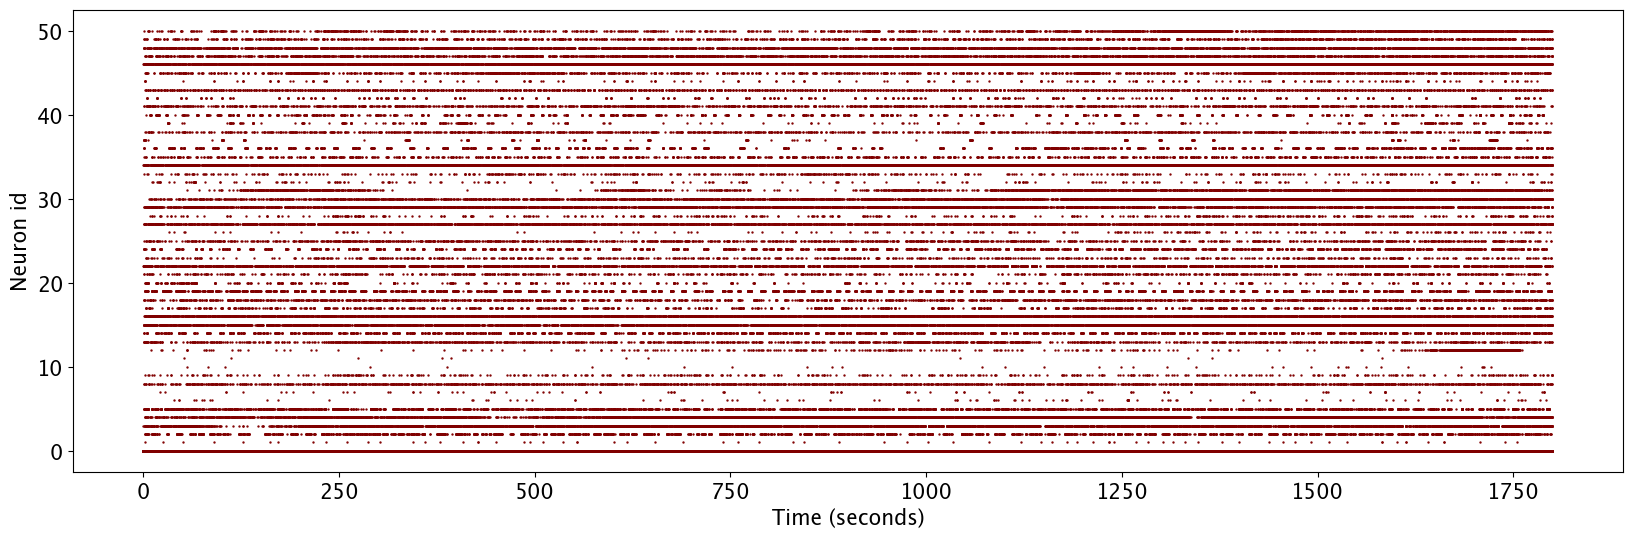

In [7]:
spike_times, neuron_idx = df.to_numpy().nonzero()
plt.figure(figsize=(20, 6))
plt.scatter(spike_times / 1000, neuron_idx, s=0.5, color='maroon') 
#plt.title('Spikes', fontsize=20)
plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Neuron id', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15) 
plt.show()

In [8]:
df.shape[1]

51

In [9]:
sum_spikes = []
for i in range(df.shape[1]):
    sum_spikes.append(sum(df.iloc[:, i]))

In [10]:
sum_spikes = sum_spikes[1:]

In [11]:
max(sum_spikes), min(sum_spikes)

(12633, 11)

In [12]:
sum_spikes

[74,
 3187,
 7227,
 5577,
 4114,
 103,
 102,
 2063,
 483,
 33,
 11,
 1408,
 1718,
 2474,
 7870,
 4814,
 1302,
 1935,
 3804,
 659,
 1026,
 6031,
 752,
 2279,
 1395,
 229,
 4657,
 548,
 4247,
 3554,
 2174,
 241,
 584,
 12633,
 1321,
 1811,
 337,
 1307,
 470,
 1452,
 1999,
 480,
 1937,
 243,
 1928,
 7151,
 3099,
 5198,
 1626,
 2100]

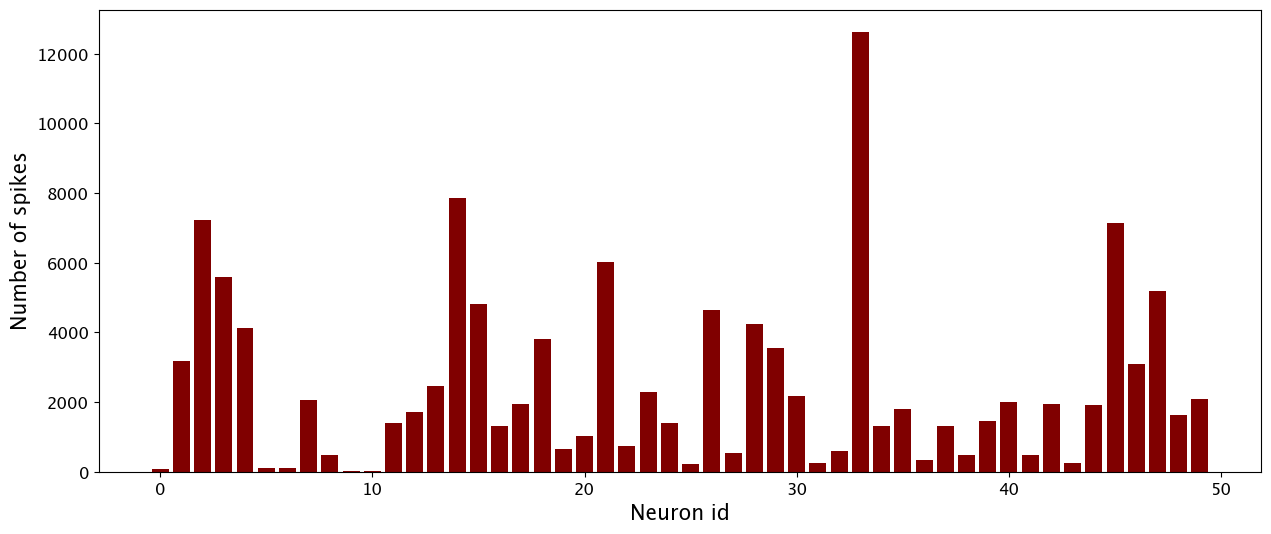

In [13]:
plt.figure(figsize=(15, 6))
plt.bar(range(df.shape[1] - 1), sum_spikes, color='maroon') 
#plt.title('Number of spikes per neuron')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Number of spikes', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

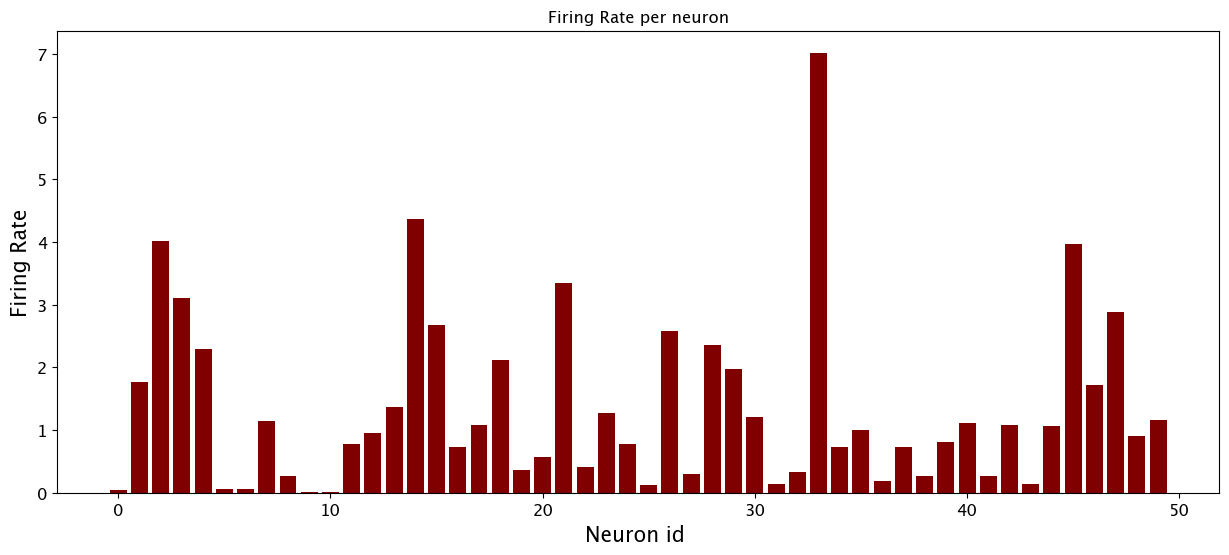

In [14]:
duration = 1800
firing_rates = [spike_count / duration for spike_count in sum_spikes]  # Firing rate 

plt.figure(figsize=(15, 6))
plt.bar(range(df.shape[1] - 1), firing_rates, color='maroon') 
plt.title('Firing Rate per neuron')
plt.xlabel('Neuron id ', fontsize=15)
plt.ylabel('Firing Rate', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

In [15]:
print(f" Mean firing rate: {mean(firing_rates)}")
print(f" Median firing rate: {median(firing_rates)}")
print(f" Standard deviation firing rate: {std(firing_rates)}")

 Mean firing rate: 1.3529666666666669
 Median firing rate: 0.9802777777777778
 Standard deviation firing rate: 1.390441614766357


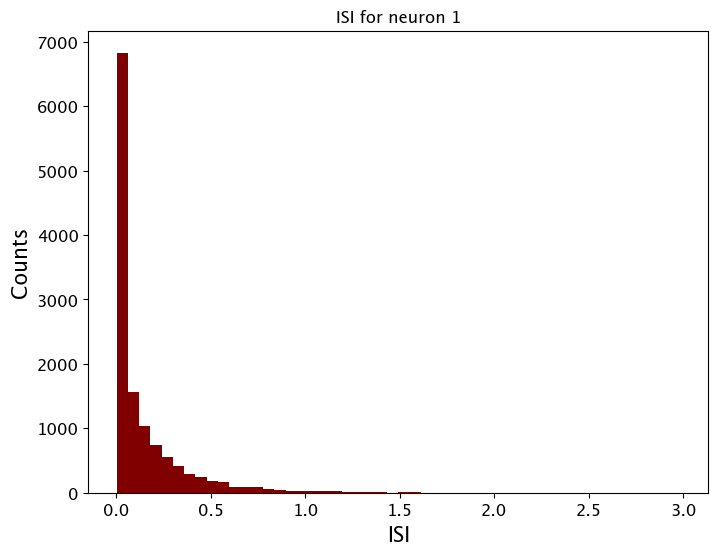

In [16]:
neuron_spikes = df.iloc[:, 34].to_numpy()
times = df.iloc[:, 0].to_numpy() 
spike_times = times[neuron_spikes == 1]
isi = np.diff(spike_times)

plt.figure(figsize=(8, 6))
plt.hist(isi, bins=50, color='maroon') 
plt.title('ISI for neuron 1')
plt.xlabel('ISI', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

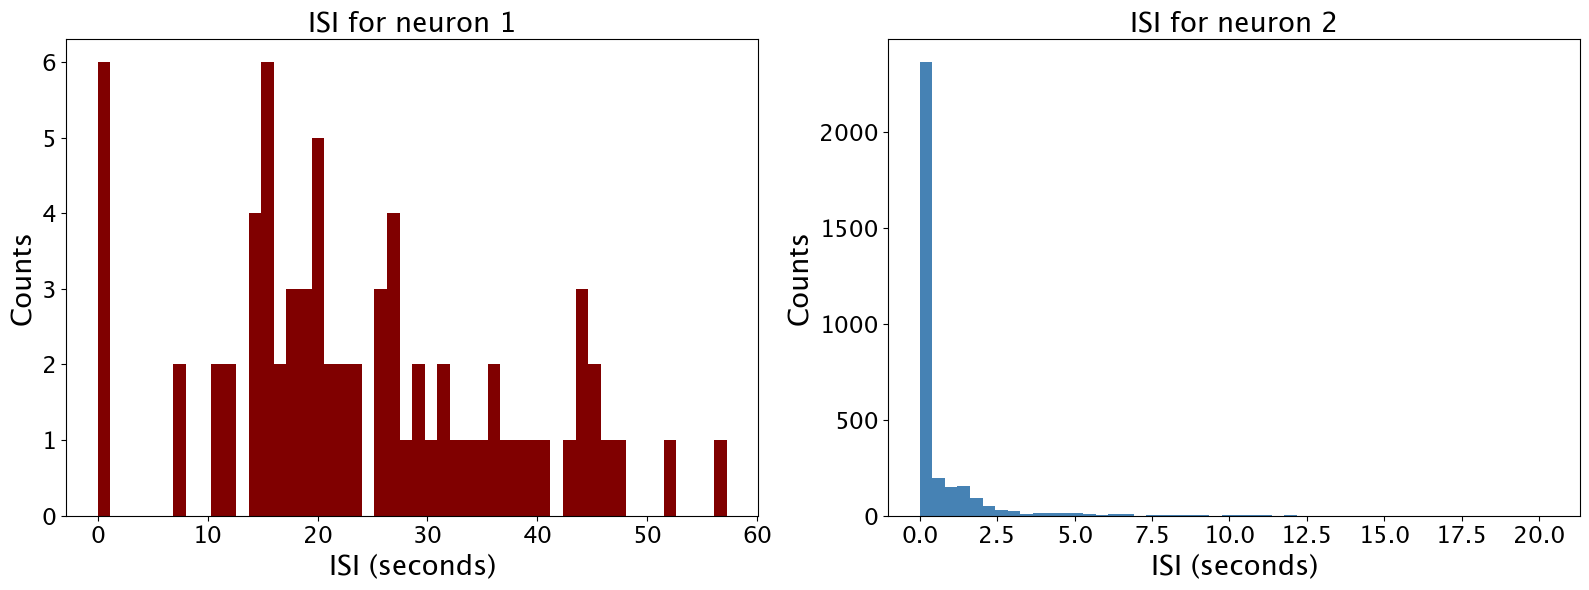

In [17]:
neuron1_spikes = df.iloc[:, 1].to_numpy()
times = df.iloc[:, 0].to_numpy()
spike_times1 = times[neuron1_spikes == 1]
isi1 = np.diff(spike_times1)

# 2
neuron2_spikes = df.iloc[:, 2].to_numpy()
spike_times2 = times[neuron2_spikes == 1]
isi2 = np.diff(spike_times2)


plt.figure(figsize=(16, 6))

# Pierwszy neuron
plt.subplot(1, 2, 1)
plt.hist(isi1, bins=50, color='maroon')
plt.title('ISI for neuron 1', fontsize=20)
plt.xlabel('ISI (seconds)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)

# Drugi neuron
plt.subplot(1, 2, 2)
plt.hist(isi2, bins=50, color='steelblue')
plt.title('ISI for neuron 2', fontsize=20)
plt.xlabel('ISI (seconds)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)

plt.tight_layout()
plt.show()


In [18]:
isi

array([0.253, 0.552, 0.16 , ..., 0.04 , 0.007, 0.006])

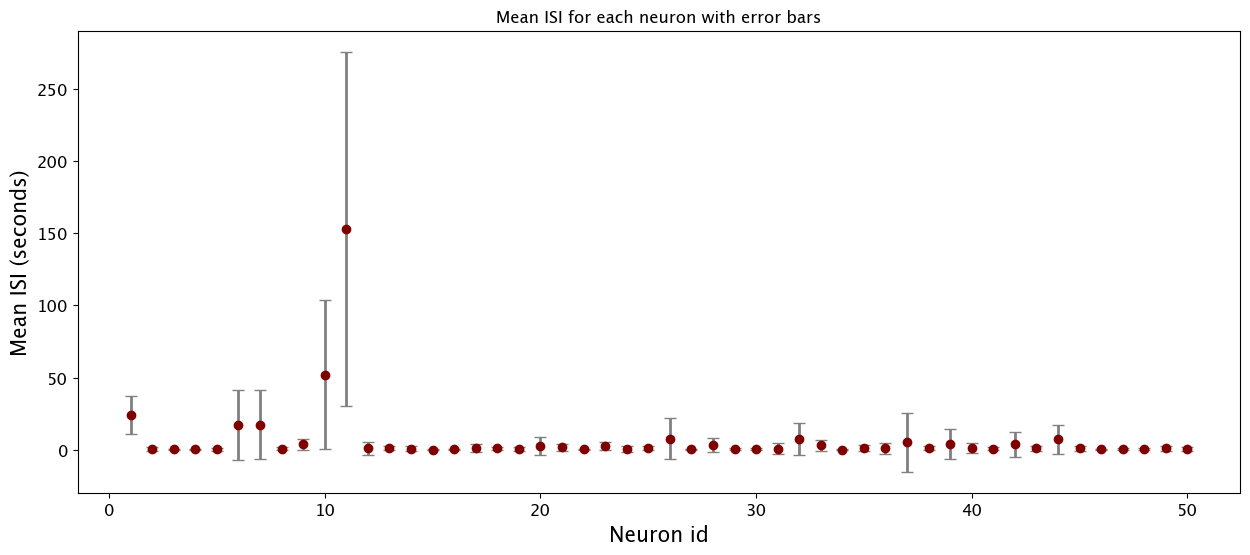

In [19]:
mean_isi_list = []
std_isi_list = []

for i in range(1, df.shape[1]): 
    neuron_spikes = df.iloc[:, i].to_numpy()
    times = df.iloc[:, 0].to_numpy()

    spike_times = times[neuron_spikes == 1]
    
    if len(spike_times) > 1:  
        isi = np.diff(spike_times)
        mean_isi = np.mean(isi) 
        mean_isi_list.append(mean_isi)  
        std_isi = np.std(isi) 
        std_isi_list.append(std_isi)
    else:
        mean_isi_list.append(np.nan) 
        std_isi_list.append(np.nan)

plt.figure(figsize=(15, 6))
plt.errorbar(range(1, df.shape[1]), mean_isi_list, yerr=std_isi_list, fmt='o', color='maroon', 
             ecolor='gray', elinewidth=2, capsize=4)  # Punkty z błędami
plt.title('Mean ISI for each neuron with error bars')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Mean ISI (seconds)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()


In [20]:
print(f" Mean ISI: {mean(mean_isi_list)}")
print(f" Median ISI: {median(mean_isi_list)}")
print(f" Standard deviation of ISI: {std(mean_isi_list)}")

 Mean ISI: 6.8077354615755
 Median ISI: 1.0207824004028612
 Standard deviation of ISI: 22.495975680415405


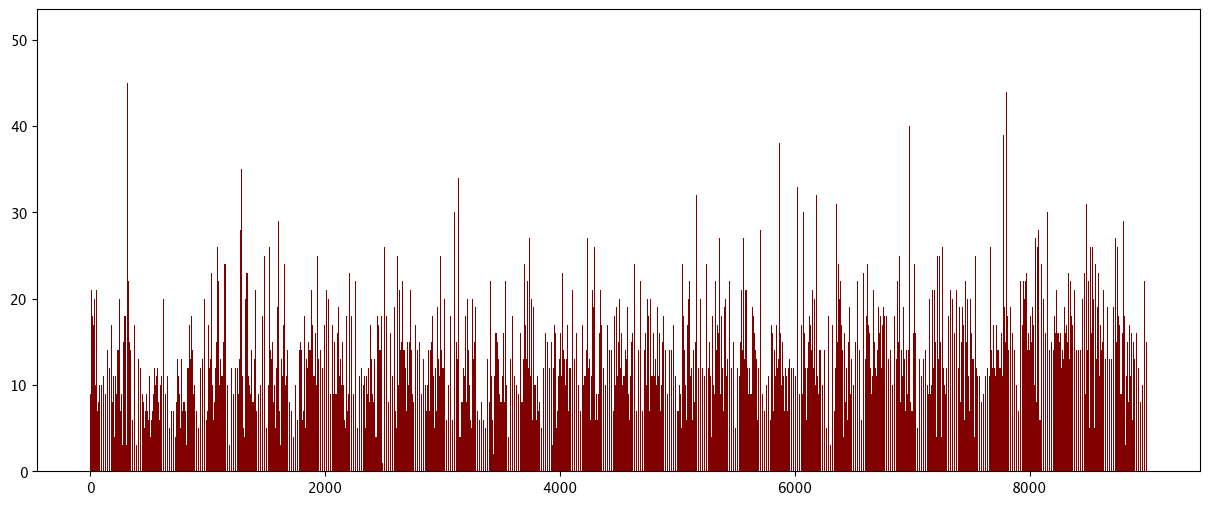

In [21]:
spikes = df.iloc[:, 1:].to_numpy() 

bin_size = 200 
num_bins = spikes.shape[0] // bin_size

binned_spikes_total = spikes[:num_bins*bin_size].reshape(num_bins, bin_size, -1).sum(axis=(1,2))

plt.figure(figsize=(15, 6))
plt.bar(range(num_bins), binned_spikes_total, color = 'maroon')
# plt.xlabel('Time bin', fontsize=15)
# plt.ylabel('Number of spikes', fontsize=15)
# plt.title('Total spikes per time bin for all neurons', fontsize=16)
# plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


Population Fano (bin_size=200 samples): 2.864


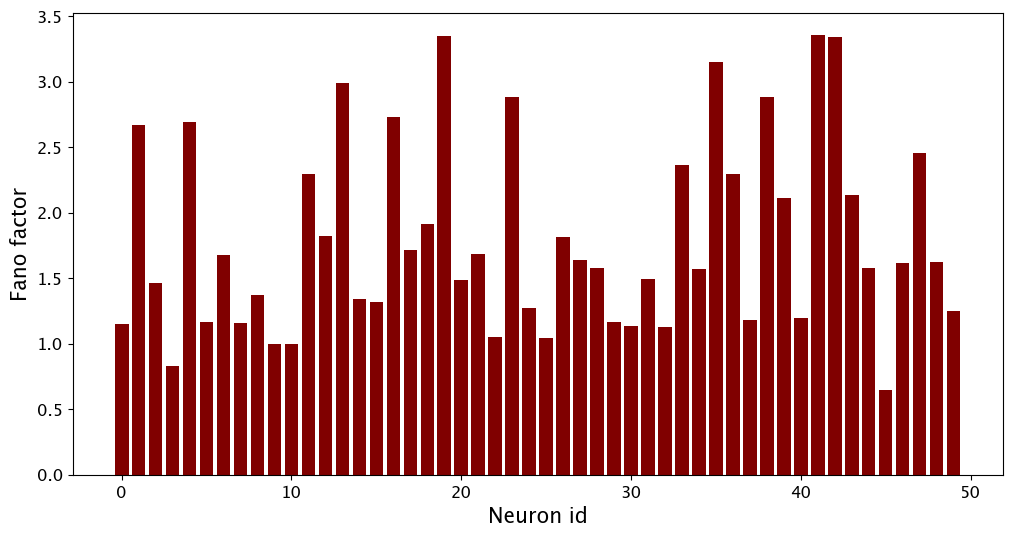

In [22]:
spikes = df.iloc[:, 1:].to_numpy()       
bin_size = 200                   
num_bins = spikes.shape[0] // bin_size
B = spikes[:num_bins*bin_size].reshape(num_bins, bin_size, -1)
counts = B.sum(axis=1)                  

mu  = counts.mean(axis=0)
var = counts.var(axis=0, ddof=1)         
ff_neuron = np.where(mu > 0, var/mu, np.nan)

pop_counts = counts.sum(axis=1)     
pop_ff = pop_counts.var(ddof=1) / pop_counts.mean()
print(f"Population Fano (bin_size={bin_size} samples): {pop_ff:.3f}")

plt.figure(figsize=(12, 6))
plt.bar(range(len(ff_neuron)), ff_neuron, color='maroon')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Fano factor', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


In [23]:
min(ff_neuron), max(ff_neuron)

(0.6443357827993411, 3.3595399488832105)

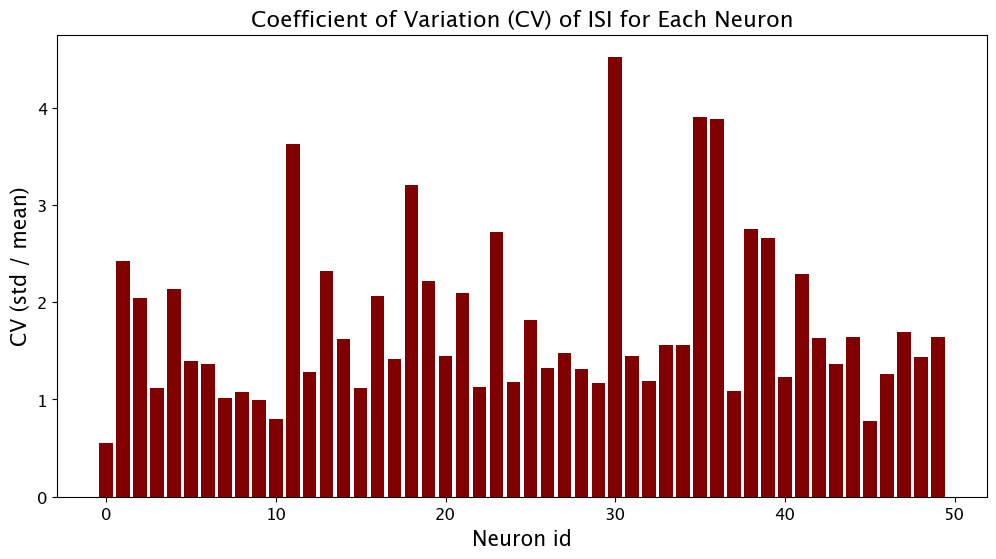

Mean CV across neurons: 1.78
Median CV across neurons: 1.46


In [24]:
num_neurons = df.shape[1] - 1  
isi_all_neurons = []
cv_all_neurons = []

for n in range(1, df.shape[1]): 
    spike_times = df.iloc[:, 0].to_numpy()[df.iloc[:, n] == 1]  
    if len(spike_times) > 1: 
        isi = np.diff(spike_times)
        isi_all_neurons.append(isi)
        cv_all_neurons.append(np.std(isi) / np.mean(isi)) 
    else:
        isi_all_neurons.append(np.array([]))
        cv_all_neurons.append(np.nan)

isi_all_flat = np.concatenate([isi for isi in isi_all_neurons if len(isi) > 0])

plt.figure(figsize=(12, 6))
plt.bar(range(num_neurons), cv_all_neurons, color='maroon')
plt.title('Coefficient of Variation (CV) of ISI for Each Neuron', fontsize=16)
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('CV (std / mean)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

print(f"Mean CV across neurons: {np.nanmean(cv_all_neurons):.2f}")
print(f"Median CV across neurons: {np.nanmedian(cv_all_neurons):.2f}")


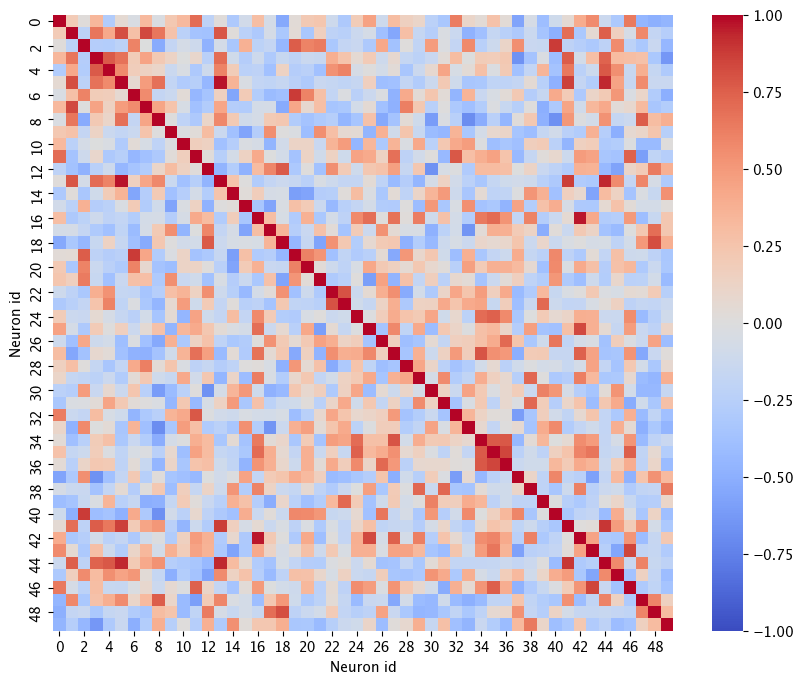

In [25]:
neurons = df.shape[1]-1
times = df.iloc[:, 0].to_numpy()

ISI_list = []
for i in range(neurons):
    spikes = df.iloc[:, i+1].to_numpy()
    spike_times = times[spikes == 1]
    isi = np.diff(spike_times)
    ISI_list.append(isi)

#dopasowujemy długość wszystkich ISI do najkrótszego neuronu
min_len = min(len(isi) for isi in ISI_list)
ISI_matrix = np.array([isi[:min_len] for isi in ISI_list])

corr_matrix = np.corrcoef(ISI_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel('Neuron id')
plt.ylabel('Neuron id')
plt.show()


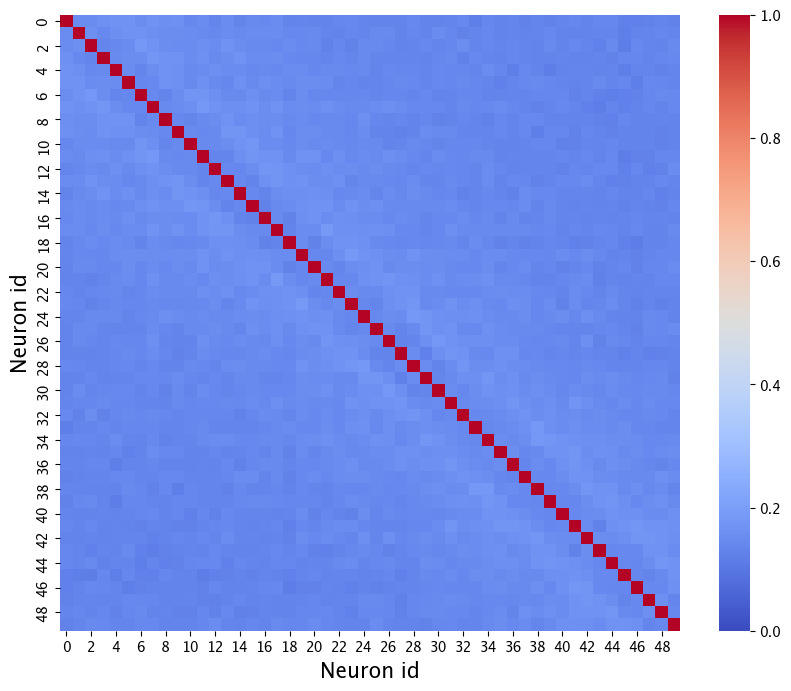

In [30]:
spike_matrix = df.iloc[:, 1:].to_numpy()
neurons = spike_matrix.shape[1]

bin_size = 100
n_bins = spike_matrix.shape[0] // bin_size
binned = spike_matrix[:n_bins*bin_size].reshape(n_bins, neurons, bin_size).sum(axis=2)
binned[binned > 0] = 1 
binned = binned.T 

sync_index = np.zeros((neurons, neurons))

for i in range(neurons):
    for j in range(i, neurons):
        coincident_spikes = np.sum((binned[i] == 1) & (binned[j] == 1))
        spikes_i = np.sum(binned[i])
        spikes_j = np.sum(binned[j])
        denom = (spikes_i + spikes_j) / 2   
        if denom > 0:
            sync = coincident_spikes / denom
        else:
            sync = 0
        sync_index[i, j] = sync
        sync_index[j, i] = sync

plt.figure(figsize=(10, 8))
sns.heatmap(sync_index, cmap='coolwarm', vmin=0, vmax=1)
plt.xlabel("Neuron id", fontsize=15)
plt.ylabel("Neuron id", fontsize=15)
plt.show()
